In [143]:
%matplotlib inline

In [144]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_df = pd.read_csv("data/mouse_drug_data.csv", 
                            keep_default_na=False, na_values=[""])
clinical_trial_df = pd.read_csv("data/clinicaltrial_data.csv",
                            keep_default_na=False, na_values=[""])

# Read the Mouse Drug Data and the Clinical Trial Data
# mouse_drug-df has 250 rows
# clinical_trial_df has 1893 rows
horizontal_stack = pd.concat([mouse_drug_df, clinical_trial_df], axis=1)
horizontal_stack

# Identify common columsns between two dataframs
# mouse_drug_df.columns - Index(['Mouse ID', 'Drug'], dtype='object')
# clinical_trial_df.columns - Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')
# 'Mouse ID' is common index

# Use Inner join to combine datasets into one dataset
merged_inner = pd.merge(left=clinical_trial_df,right=mouse_drug_df, left_on='Mouse ID', right_on='Mouse ID')
merged1_df = merged_inner
merged1_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [145]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint - Use groupby
# https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/#targetText=Pandas%20dataframe.groupby()%20function,of%20labels%20to%20group%20names.&targetText=sort%20%3A%20Sort%20group%20keys.
merged1_df.groupby("Drug")["Timepoint"].count()

tumor_response = merged1_df.groupby(["Drug","Timepoint"])
tumor_response = tumor_response["Tumor Volume (mm3)"].mean()

# Convert to DataFrame - use .to_frame()
tumor_response_df = tumor_response.to_frame()

# Preview DataFrame
tumor_response_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [146]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint - use .sem() function
tumor_response_error = merged1_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame; t_r_e is 'tumar response error'
t_r_e_df = tumor_response_error.to_frame()

# Preview DataFrame
t_r_e_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [147]:
# Minor Data Munging to Re-Format the Data Frames - use .unstack()
tumor_plot = tumor_response_df.unstack(0)
# create dataframe
tumor_plot_df = tumor_plot["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_plot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


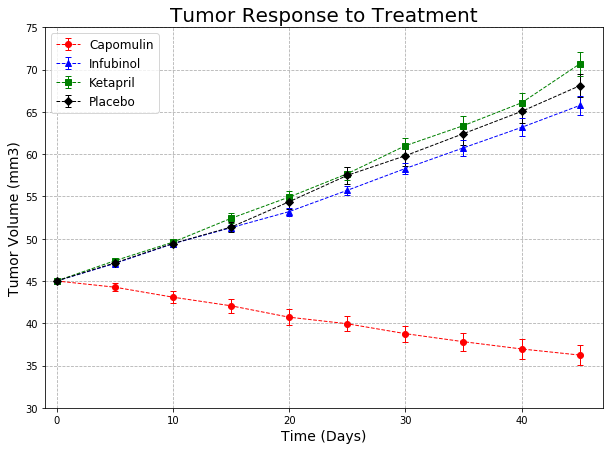

In [148]:
# Generate the Plot using error bars; see, 
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot

# create axis's
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7))

# make errorbars for drugs capoumlin, infubinal, ketapril, and placebo
error = t_r_e_df["Tumor Volume (mm3)"]["Capomulin"]
capomulin = plt.errorbar(x_axis, tumor_plot_df["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red")

error = t_r_e_df["Tumor Volume (mm3)"]["Infubinol"]
infubinal = plt.errorbar(x_axis, tumor_plot_df["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue")

error = t_r_e_df["Tumor Volume (mm3)"]["Ketapril"]
ketapril = plt.errorbar(x_axis, tumor_plot_df["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "green")

error = t_r_e_df["Tumor Volume (mm3)"]["Placebo"]
placebo = plt.errorbar(x_axis, tumor_plot_df["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "black")

# make limitations for x and y axis
plt.ylim(30, 75)
plt.xlim(-1, 47)

# create labels for plot chard
plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

# create chart lines
plt.grid(linestyle="dashed")

# create legend
plt.legend((capomulin, infubinal, ketapril, placebo), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)

# Show the Figure
plt.show()




## Metastatic Response to Treatment

In [149]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
merged1_df.groupby("Drug")["Timepoint"].count()
metatastic_sites = merged1_df.groupby(["Drug","Timepoint"])

# Convert to DataFrame
metatastic_sites_df = metatastic_sites["Metastatic Sites"].mean().to_frame()

# Preview DataFrame
metatastic_sites_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [150]:
# Store the Standard Error assoicaited with Met. Sites Grouped by Drug and Timpeoint - response error - '_re'
metatastic_re = merged1_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
metatastic_re_df = metatastic_re.to_frame()

# Preview DataFrame
metatastic_re_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [151]:
# Minor Data Munging to Re-Format the Data Frames
metatastic_plot_df = metatastic_sites_df["Metastatic Sites"].unstack(0)

# Preview that Reformatting worked
metatastic_plot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


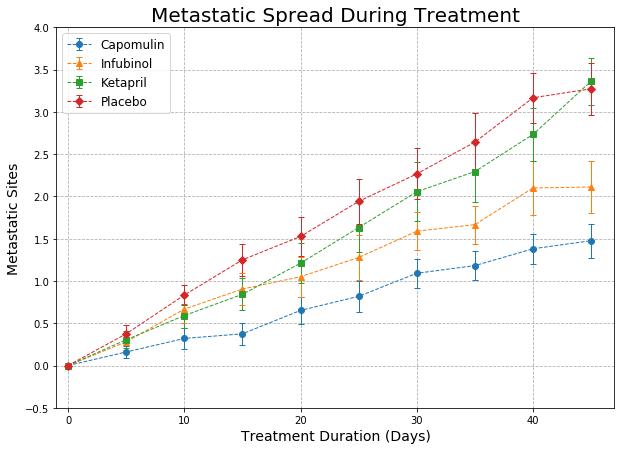

In [154]:
# Generate the Plot using error bars; see, 
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot

# determine plot
plt.figure(figsize=(10,7))

# make errorbars for drugs capoumlin, infubinal, ketapril, and placebo
error1 = metatastic_re_df["Metastatic Sites"]["Capomulin"]
capomulin1 = plt.errorbar(x_axis, metatastic_plot_df["Capomulin"], yerr=error1, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3)

error1 = metatastic_re_df["Metastatic Sites"]["Infubinol"]
infubino1 = plt.errorbar(x_axis, metatastic_plot_df["Infubinol"], yerr=error1, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)

error1 = metatastic_re_df["Metastatic Sites"]["Ketapril"]
ketapril1 = plt.errorbar(x_axis, metatastic_plot_df["Ketapril"], yerr=error1, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3)

error1 = metatastic_re_df["Metastatic Sites"]["Placebo"]
placebo1 = plt.errorbar(x_axis, metatastic_plot_df["Placebo"], yerr=error1, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3)

# make limitations for x and y axis
plt.ylim(-.5, 4)
plt.xlim(-1, 47)

# create labels for plot chard
plt.title("Metastatic Spread During Treatment", fontsize=20)
plt.xlabel("Treatment Duration (Days)", fontsize=14)
plt.ylabel("Metastatic Sites", fontsize=14)

# create chart lines
plt.grid(linestyle="dashed")

# create legend
plt.legend((capomulin1, infubino1, ketapril1, placebo1), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)

# show plot figure
plt.show()

## Survival Rates

In [155]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = merged1_df.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique()

# Convert to DataFrame
mice1 = mice.to_frame()
mice = mice1.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
mice.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [156]:
# Minor Data Munging to Re-Format the Data Frames
mice_plot = mice.unstack(0)
mice_df = mice_plot["Mouse Count"]

# Preview the Data Frame
mice_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


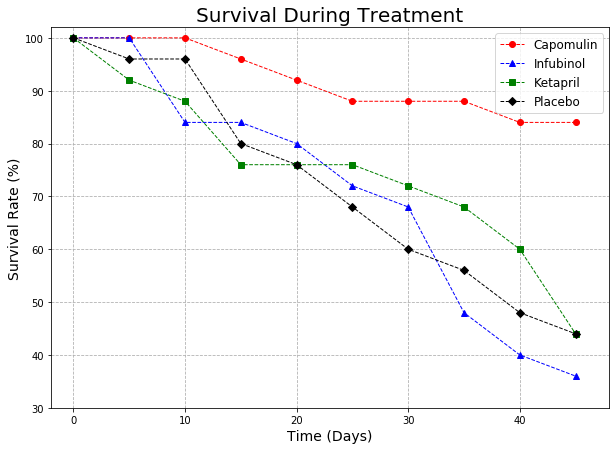

In [163]:
# Generate the Plot using error bars; see, 
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot

# determine plot
plt.figure(figsize=(10,7))

# make errorbars for drugs capoumlin, infubinal, ketapril, and placebo
capomulin2 = plt.errorbar(x_axis, (mice_df["Capomulin"]/25*100), fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "red")
infubinol2 = plt.errorbar(x_axis, (mice_df["Infubinol"]/25*100), fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "blue")
ketapril2 = plt.errorbar(x_axis, (mice_df["Ketapril"]/25*100),  fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="green")
placebo2 = plt.errorbar(x_axis, (mice_df["Placebo"]/25*100),  fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="black")

# make limitations for x and y axis
plt.ylim(30, 102)
plt.xlim(-2, 48)

# create labels for plot chart
plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)

# create chart lines
plt.grid(linestyle="dashed")

# create legend
plt.legend((capomulin2, infubinol2, ketapril2, placebo2), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)

# show plot figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [176]:
# Calculate the percent changes for capomulin, infubinol, ketapril, and placebo
capomulin_change = ((tumor_plot_df["Capomulin"][45] - tumor_plot_df["Capomulin"][0])/45)*100
ceftamin_change = ((tumor_plot_df["Ceftamin"][45] - tumor_plot_df["Ceftamin"][0])/45)*100
infubinol_change = ((tumor_plot_df["Infubinol"][45] - tumor_plot_df["Infubinol"][0])/45)*100
ketapril_change = ((tumor_plot_df["Ketapril"][45] - tumor_plot_df["Ketapril"][0])/45)*100
naftisol_change = ((tumor_plot_df["Naftisol"][45] - tumor_plot_df["Naftisol"][0])/45)*100
placebo_change = ((tumor_plot_df["Placebo"][45] - tumor_plot_df["Placebo"][0])/45)*100
propriva_change = ((tumor_plot_df["Propriva"][45] - tumor_plot_df["Propriva"][0])/45)*100
ramicane_change = ((tumor_plot_df["Ramicane"][45] - tumor_plot_df["Ramicane"][0])/45)*100
stelasyn_change = ((tumor_plot_df["Stelasyn"][45] - tumor_plot_df["Stelasyn"][0])/45)*100
zonifero_change = ((tumor_plot_df["Zoniferol"][45] - tumor_plot_df["Zoniferol"][0])/45)*100

# create dataframe
drug_change_df = pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo"],
                               "Percent Change": [capomulin_change, infubinol_change, ketapril_change, placebo_change]
                              })

# display the data to confirm
drug_change_df


,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


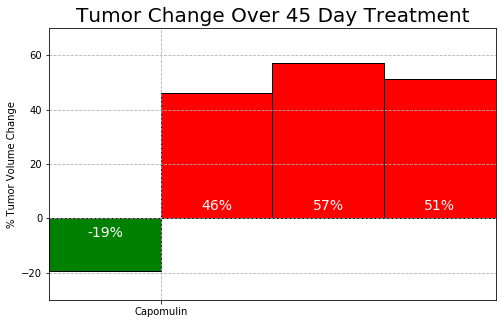

In [193]:
plt.figure(figsize=(8,5))

# create retanglur bars for each of the four drug
rects1 = plt.bar(0, drug_change_df["Percent Change"][0], color='g', alpha=1, align="edge", ec="black", width=1)
rects2 = plt.bar(1, drug_change_df["Percent Change"][1], color='r', alpha=1, align="edge", ec="black", width=1)
rects3 = plt.bar(2, drug_change_df["Percent Change"][2], color='r', alpha=1, align="edge", ec="black", width=1)
rects4 = plt.bar(3, drug_change_df["Percent Change"][3], color='r', alpha=1, align="edge", ec="black", width=1)

# edit ticks and x,y axis
tick_locations = [value+1 for value in x_axis]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations, drug_change_df["Drug"])

# make limitations for chart
plt.xlim(0, 4)
plt.ylim(-30, 70)

# create lables
plt.title("Tumor Change Over 45 Day Treatment", fontsize=20)
plt.ylabel("% Tumor Volume Change")

# funcion to label percentages
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects1)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)
        
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# show figure
plt.show()